In [24]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sb
from pylab import rcParams
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter

In [25]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [26]:
cd /home/bhanu/Downloads


/home/bhanu/Downloads


In [27]:
see=pd.read_csv('iris.data.csv')
see.columns=['sepal length','sepal width','petal length','petal width','species']
see

,sepal length,sepal width,petal length,petal width,species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
5,4.6,3.4,1.4,0.3,setosa
6,5.0,3.4,1.5,0.2,setosa
7,4.4,2.9,1.4,0.2,setosa
8,4.9,3.1,1.5,0.1,setosa
9,5.4,3.7,1.5,0.2,setosa


In [28]:
data=see.iloc[:,0:4]
target=see.iloc[:,4]
see[:5]

,sepal length,sepal width,petal length,petal width,species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [29]:
model=DBSCAN(eps=0.8,min_samples=19).fit(data)

In [41]:
outliers_df=pd.DataFrame(data)
print(Counter(model.labels_))
outliers_df[model.labels_==-1]


Counter({1: 94, 0: 49, -1: 6})


,sepal length,sepal width,petal length,petal width
97,5.1,2.5,3.0,1.1
104,7.6,3.0,6.6,2.1
116,7.7,3.8,6.7,2.2
117,7.7,2.6,6.9,2.3
121,7.7,2.8,6.7,2.0
130,7.9,3.8,6.4,2.0


Text(0.5,1,'dbscan')

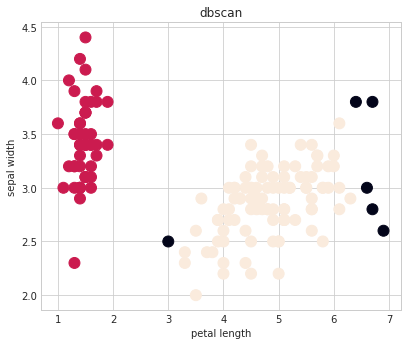

In [46]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
colors=model.labels_
ax.scatter(data.iloc[:,2],data.iloc[:,1],c=colors,s=120)
ax.set_xlabel('petal length')
ax.set_ylabel('sepal width')
plt.title('dbscan')